<a href="https://colab.research.google.com/github/XhrisGG/challenge_data_science/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [3]:
# Almacenamos todas las tiendas en una lista para manejo eficiente
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Calculamos ingresos y convertimos a enteros
ingresos = [int(sum(tienda['Precio'])) for tienda in tiendas]

# Unimos nombres con sus valores
resultados = list(zip(nombres, ingresos))

print("🏪 INGRESOS TOTALES POR TIENDA:")
print("_" *40)
print("")

for nombre, total in resultados:
  # Formato sin decimales para agregar decimal eje: total:,.2f}")
    print(f"→ {nombre}: ${total:,}")

# Encontramos la mejor tienda
mejor_tienda = max(resultados, key=lambda x: x[1])
print(f"\nLa tienda con mayor facturación es 🏆 {mejor_tienda[0]} con ${mejor_tienda[1]:,}")

🏪 INGRESOS TOTALES POR TIENDA:
________________________________________

→ Tienda 1: $1,150,880,400
→ Tienda 2: $1,116,343,500
→ Tienda 3: $1,098,019,600
→ Tienda 4: $1,038,375,700

La tienda con mayor facturación es 🏆 Tienda 1 con $1,150,880,400


#Generando graficos

Después de realizar los análisis, es hora de transformar sus resultados en visualizaciones que le ayuden a comprender mejor los patrones y los insights encontrados. Se recomiendan 3 tipos de graficos (Column,Pie,Line,Bar,Area,Column-Line)

# Matplotlib
En Python, Matplotlib es una biblioteca muy conocida para crear gráficos. Para comenzar a usarla, primero debemos instalarla ejecutando:

In [10]:
pip install matplotlib

Una vez instalada, importamos la biblioteca en nuestro código y le daremos un alias plt:

In [11]:
import matplotlib.pyplot as plt

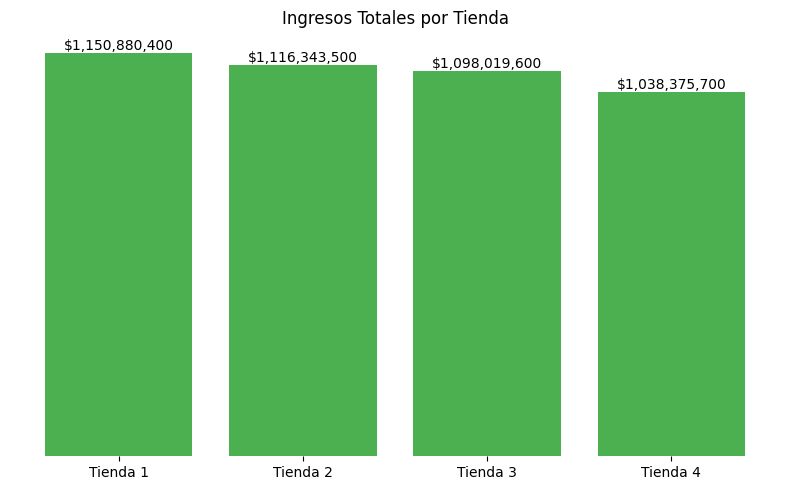

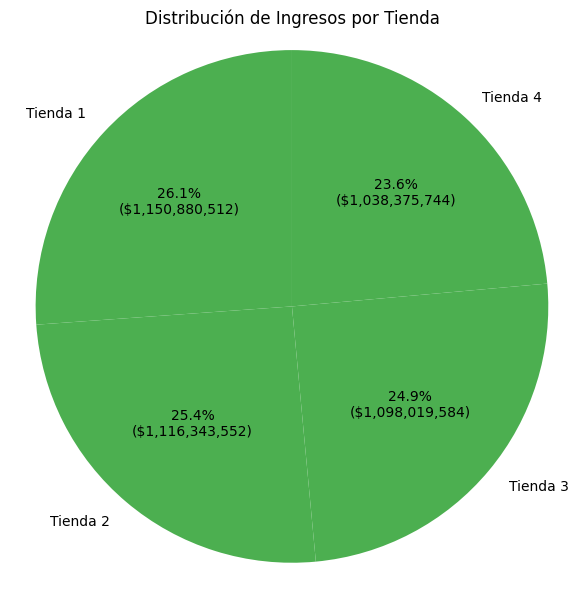

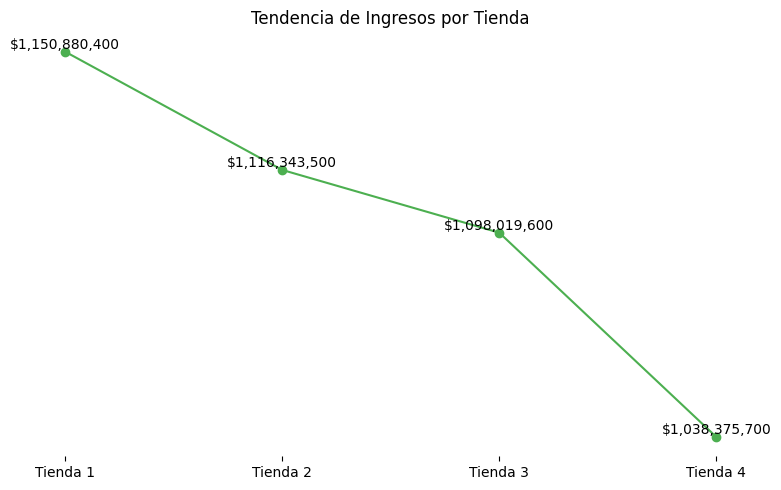

In [12]:
# Datos
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
ingresos = [int(sum(tienda['Precio'])) for tienda in tiendas]
resultados = list(zip(nombres, ingresos))

print("\n"*2)  # Espacio entre gráficos

# Color único para todos los gráficos
color = '#4CAF50'

# Gráfico de barras
plt.figure(figsize=(8, 5))
bars = plt.bar(nombres, ingresos, color=color)
plt.title('Ingresos Totales por Tienda')
plt.xticks(rotation=0)
plt.yticks([])  # Oculta el eje Y
plt.box(False)  # Elimina el marco

# Agregar etiquetas en las barras
for bar, ingreso in zip(bars, ingresos):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"${ingreso:,}",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("\n"*2)  # Espacio entre gráficos

# Gráfico circular
plt.figure(figsize=(6, 6))
plt.pie(ingresos, labels=nombres, autopct=lambda p: f'{p:.1f}%\n(${int(p*sum(ingresos)/100):,})',
        startangle=90, colors=[color]*len(nombres))
plt.title('Distribución de Ingresos por Tienda')
plt.axis('equal')
plt.tight_layout()
plt.show()

print("\n"*2)  # Espacio entre gráficos

# Gráfico de línea
plt.figure(figsize=(8, 5))
plt.plot(nombres, ingresos, marker='o', linestyle='-', color=color)
plt.title('Tendencia de Ingresos por Tienda')
plt.xticks(rotation=0)
plt.yticks([])  # Oculta el eje Y
plt.box(False)  # Elimina el marco

# Agregar valores en cada punto
for x, y in zip(nombres, ingresos):
    plt.text(x, y, f"${y:,}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

En este analisis se calcula la cantidad de productos vendidos por categoría en cada tienda. Agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las 3 categorías más populares de cada tienda. Tambien se indica que tienda es la mas y menos exitosa en numero de ventas.

In [13]:
# Convertir DataFrames a listas de diccionarios
datos_tienda1 = tienda.to_dict('records')
datos_tienda2 = tienda2.to_dict('records')
datos_tienda3 = tienda3.to_dict('records')
datos_tienda4 = tienda4.to_dict('records')

# Lista con todas las tiendas y sus nombres
tiendas = [
    ("Tienda 1", datos_tienda1),
    ("Tienda 2", datos_tienda2),
    ("Tienda 3", datos_tienda3),
    ("Tienda 4", datos_tienda4)
]

# Procesar todas las tiendas
resultados = []
for nombre, datos in tiendas:
    # Diccionario para contar categorías
    categorias = {}

    # Contar ventas por categoría
    for producto in datos:
        categoria = producto['Categoría del Producto']
        if categoria in categorias:
            categorias[categoria] += 1
        else:
            categorias[categoria] = 1

    # Ordenar de mayor a menor
    categorias_ordenadas = sorted(categorias.items(), key=lambda x: x[1], reverse=True)

    resultados.append((nombre, categorias_ordenadas))

# Mostrar resultados
print("🏪 CATEGORÍAS MÁS VENDIDAS POR TIENDA\n")
for nombre, categorias in resultados:
    print(f"→ {nombre}:")
    for i, (categoria, cantidad) in enumerate(categorias[:3], 1):
        print(f"   {i}. {categoria}: {cantidad} ventas")
    print("─" * 40)

# Calcular tienda con más ventas totales
total_ventas = []
for nombre, categorias in resultados:
    total = sum(cantidad for _, cantidad in categorias)
    total_ventas.append((nombre, total))

tienda_top = max(total_ventas, key=lambda x: x[1])
print(f"\n🏆 LA TIENDA CON MEJORES VENTAS: {tienda_top[0]} con {tienda_top[1]} ventas totales")

tienda_top = min(total_ventas, key=lambda x: x[1])
print(f"\n❌ LA TIENDA CON MENOS VENTAS: {tienda_top[0]} con {tienda_top[1]} ventas totales")

🏪 CATEGORÍAS MÁS VENDIDAS POR TIENDA

→ Tienda 1:
   1. Muebles: 465 ventas
   2. Electrónicos: 448 ventas
   3. Juguetes: 324 ventas
────────────────────────────────────────
→ Tienda 2:
   1. Muebles: 442 ventas
   2. Electrónicos: 422 ventas
   3. Juguetes: 313 ventas
────────────────────────────────────────
→ Tienda 3:
   1. Muebles: 499 ventas
   2. Electrónicos: 451 ventas
   3. Juguetes: 315 ventas
────────────────────────────────────────
→ Tienda 4:
   1. Muebles: 480 ventas
   2. Electrónicos: 451 ventas
   3. Juguetes: 338 ventas
────────────────────────────────────────

🏆 LA TIENDA CON MEJORES VENTAS: Tienda 1 con 2359 ventas totales

❌ LA TIENDA CON MENOS VENTAS: Tienda 4 con 2358 ventas totales


## Generando graficos

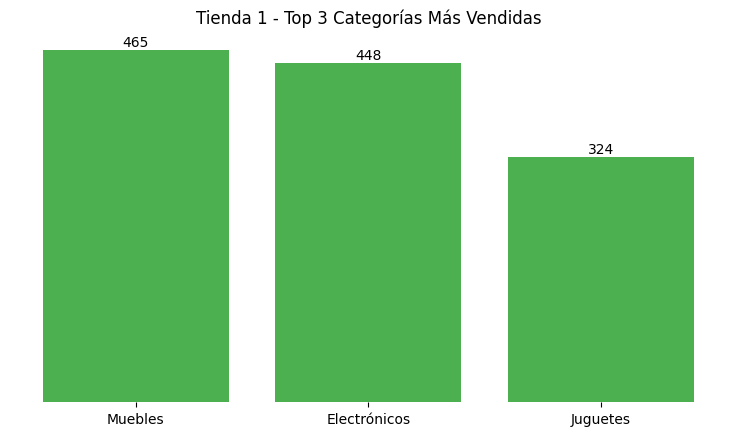

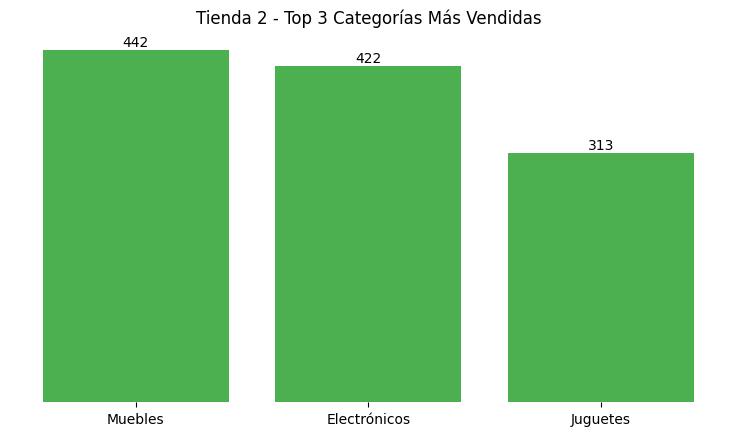

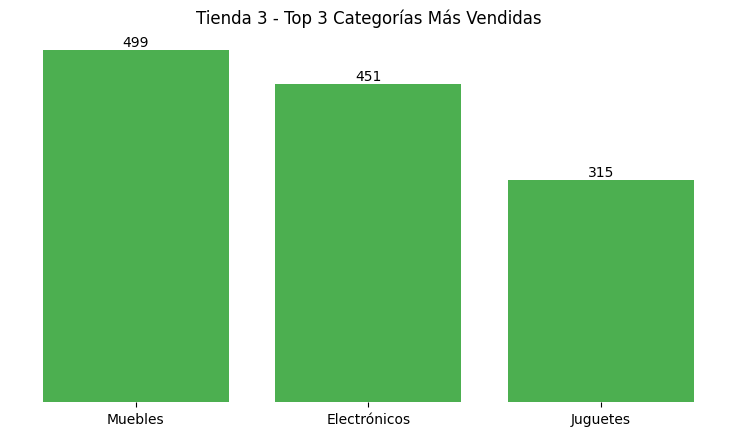

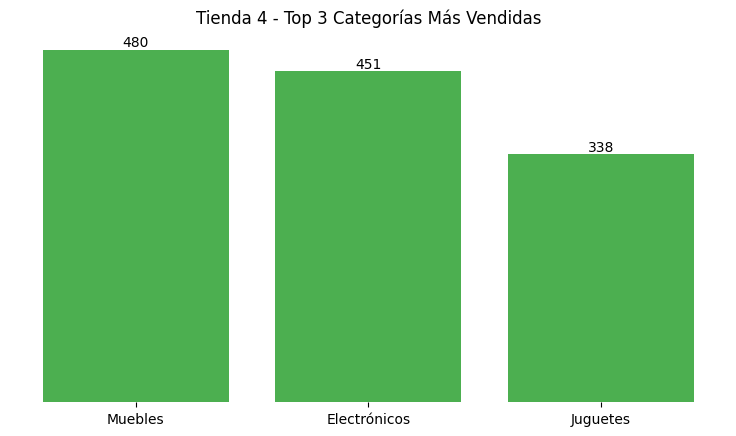

In [14]:
# Convertir DataFrames a listas de diccionarios
datos_tienda1 = tienda.to_dict('records')
datos_tienda2 = tienda2.to_dict('records')
datos_tienda3 = tienda3.to_dict('records')
datos_tienda4 = tienda4.to_dict('records')

# Lista con todas las tiendas y sus nombres
tiendas = [
    ("Tienda 1", datos_tienda1),
    ("Tienda 2", datos_tienda2),
    ("Tienda 3", datos_tienda3),
    ("Tienda 4", datos_tienda4)
]

print("\n" * 2)  # Espacio entre gráficos

# Gráficos por tienda (Top 3 categorías más vendidas)
color = "#4CAF50"

for nombre, categorias in resultados:
    top_categorias = categorias[:3]
    labels = [cat for cat, _ in top_categorias]
    valores = [cant for _, cant in top_categorias]

    plt.figure(figsize=(8, 5))
    bars = plt.bar(labels, valores, color=color)
    plt.title(f"{nombre} - Top 3 Categorías Más Vendidas")
    plt.yticks([])  # Oculta eje Y
    plt.box(False)

    # Etiquetas encima de las barras
    for bar, valor in zip(bars, valores):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{valor}",
                 ha='center', va='bottom', fontsize=10)

    plt.tight_layout(pad=3)
    plt.show()
    print("\n" * 2)  # Espacio entre gráficos

# 3. Calificación promedio de la tienda


In [15]:
# Convertir DataFrames a listas de diccionarios
datos_tiendas = [
    ("Tienda 1", tienda.to_dict('records')),
    ("Tienda 2", tienda2.to_dict('records')),
    ("Tienda 3", tienda3.to_dict('records')),
    ("Tienda 4", tienda4.to_dict('records'))
]

# Calcular promedios
resultados = []
for nombre, ventas in datos_tiendas:
    total_calificaciones = 0
    contador = 0

    for producto in ventas:
        try:
            # Sumar calificaciones válidas
            total_calificaciones += float(producto['Calificación'])
            contador += 1
        except (KeyError, ValueError):
            continue

    promedio = total_calificaciones / contador if contador > 0 else 0
    resultados.append((nombre, round(promedio, 2)))

# Mostrar resultados
print("⭐ CALIFICACIONES PROMEDIO POR TIENDA ⭐\n")
for nombre, promedio in resultados:
    print(f"→ {nombre}: {promedio}/5.0")
    print("★" * int(promedio) + "☆" * (5 - int(promedio)))
    print("─" * 40)

# Encontrar la mejor calificada
mejor_tienda = max(resultados, key=lambda x: x[1])
print(f"\n🏆 MEJOR CALIFICACIÓN: {mejor_tienda[0]} ({mejor_tienda[1]}/5.0)")

# Encontrar la peor calificada
peor_tienda = min(resultados, key=lambda x: x[1])
print(f"\n🏆 MENOR CALIFICACIÓN: {peor_tienda[0]} ({peor_tienda[1]}/5.0)")

⭐ CALIFICACIONES PROMEDIO POR TIENDA ⭐

→ Tienda 1: 3.98/5.0
★★★☆☆
────────────────────────────────────────
→ Tienda 2: 4.04/5.0
★★★★☆
────────────────────────────────────────
→ Tienda 3: 4.05/5.0
★★★★☆
────────────────────────────────────────
→ Tienda 4: 4.0/5.0
★★★★☆
────────────────────────────────────────

🏆 MEJOR CALIFICACIÓN: Tienda 3 (4.05/5.0)

🏆 MENOR CALIFICACIÓN: Tienda 1 (3.98/5.0)


## Generando graficos Calificación promedio de la tienda

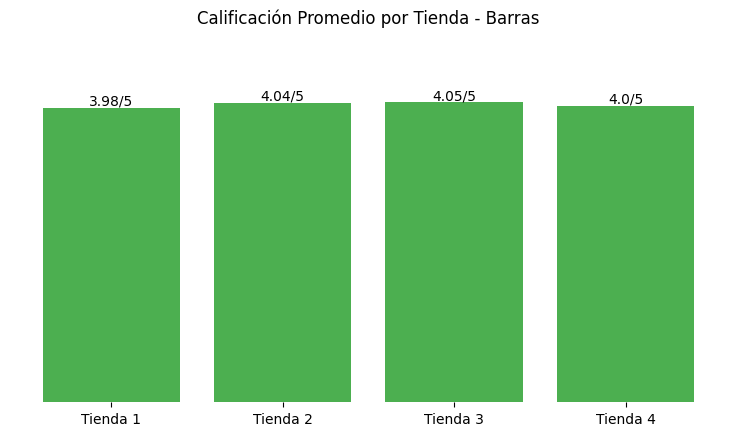

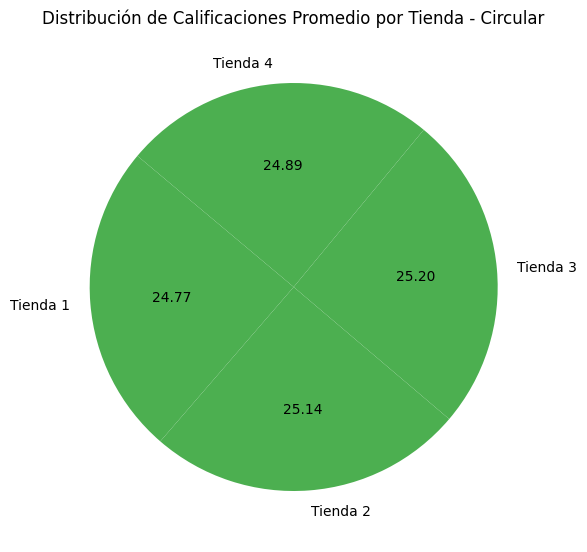

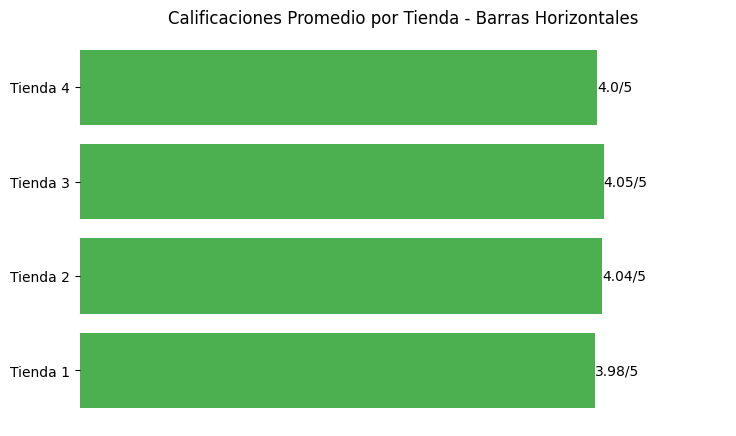

In [16]:
print("\n" * 2)  # Espacio entre gráficos

# Datos para gráficos
nombres = [nombre for nombre, _ in resultados]
promedios = [valor for _, valor in resultados]
color = "#4CAF50"

# --- Gráfico de columnas ---
plt.figure(figsize=(8, 5))
bars = plt.bar(nombres, promedios, color=color)
plt.title("Calificación Promedio por Tienda - Barras")
plt.yticks([])
plt.ylim(0, 5)
plt.box(False)

for bar, promedio in zip(bars, promedios):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{promedio}/5",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout(pad=3)
plt.show()
print("\n" * 2)

# --- Gráfico circular ---
plt.figure(figsize=(6, 6))
plt.pie(promedios, labels=nombres, autopct='%1.2f', startangle=140, colors=[color]*len(nombres))
plt.title("Distribución de Calificaciones Promedio por Tienda - Circular")
plt.tight_layout()
plt.show()
print("\n" * 2)

# --- Gráfico de barras horizontales ---
plt.figure(figsize=(8, 5))
bars_h = plt.barh(nombres, promedios, color=color)
plt.title("Calificaciones Promedio por Tienda - Barras Horizontales")
plt.xticks([])
plt.xlim(0, 5)
plt.box(False)

for bar, promedio in zip(bars_h, promedios):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"{promedio}/5",
             ha='left', va='center', fontsize=10)

plt.tight_layout(pad=3)
plt.show()
print("\n" * 2)

# 4. Productos más y menos vendidos

In [17]:
# Convertir DataFrames a listas de diccionarios
tiendas = [
    ("Tienda 1", tienda.to_dict('records')),
    ("Tienda 2", tienda2.to_dict('records')),
    ("Tienda 3", tienda3.to_dict('records')),
    ("Tienda 4", tienda4.to_dict('records'))
]

resultados = []
for nombre, ventas in tiendas:
    contador = {}

    # Contar apariciones de cada producto
    for producto in ventas:
        try:
            nombre_producto = producto['Producto']
            contador[nombre_producto] = contador.get(nombre_producto, 0) + 1
        except KeyError:
            continue

    # Ordenar productos por popularidad
    productos_ordenados = sorted(contador.items(), key=lambda x: x[1], reverse=True)

    # Guardar resultados
    resultados.append((nombre, productos_ordenados))

# Mostrar análisis por tienda
print("📈 PRODUCTOS MÁS Y MENOS VENDIDOS 📉\n")
for nombre, productos in resultados:
    print(f"🏪 {nombre}:")

    print("  🏆 TOP 3:")
    for i, (prod, cant) in enumerate(productos[:3], 1):
        print(f"    {i}. {prod}: {cant} unidades")

    print("\n  🚨 MENOS VENDIDOS:")
    for i, (prod, cant) in enumerate(productos[-3:], 1):
        print(f"    {i}. {prod}: {cant} unidades")

    print("─" * 50)

# Encontrar el producto más vendido globalmente
all_products = {}
for _, productos in resultados:
    for prod, cant in productos:
        all_products[prod] = all_products.get(prod, 0) + cant

top_global = max(all_products.items(), key=lambda x: x[1])
flop_global = min(all_products.items(), key=lambda x: x[1])

print(f"\n🔥 PRODUCTO ESTRELLA: {top_global[0]} ({top_global[1]} ventas totales)")
print(f"💤 PRODUCTO MENOS POPULAR: {flop_global[0]} ({flop_global[1]} ventas totales)")

📈 PRODUCTOS MÁS Y MENOS VENDIDOS 📉

🏪 Tienda 1:
  🏆 TOP 3:
    1. Microondas: 60 unidades
    2. TV LED UHD 4K: 60 unidades
    3. Armario: 60 unidades

  🚨 MENOS VENDIDOS:
    1. Olla de presión: 35 unidades
    2. Auriculares con micrófono: 33 unidades
    3. Celular ABXY: 33 unidades
──────────────────────────────────────────────────
🏪 Tienda 2:
  🏆 TOP 3:
    1. Iniciando en programación: 65 unidades
    2. Microondas: 62 unidades
    3. Batería: 61 unidades

  🚨 MENOS VENDIDOS:
    1. Mesa de comedor: 34 unidades
    2. Impresora: 34 unidades
    3. Juego de mesa: 32 unidades
──────────────────────────────────────────────────
🏪 Tienda 3:
  🏆 TOP 3:
    1. Kit de bancas: 57 unidades
    2. Mesa de comedor: 56 unidades
    3. Cama king: 56 unidades

  🚨 MENOS VENDIDOS:
    1. Mochila: 36 unidades
    2. Microondas: 36 unidades
    3. Bloques de construcción: 35 unidades
──────────────────────────────────────────────────
🏪 Tienda 4:
  🏆 TOP 3:
    1. Cama box: 62 unidades
    2. Cube

## Generando Grafcos Productos más y menos vendidos

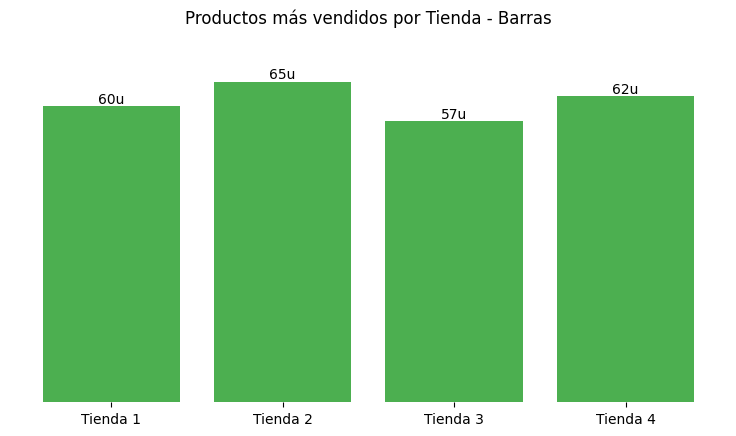

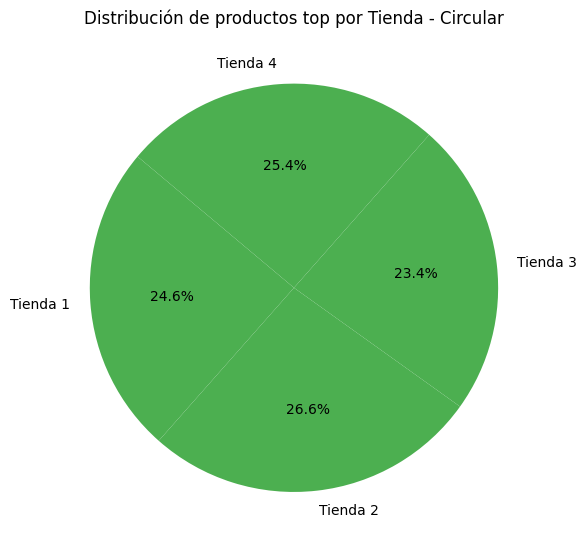

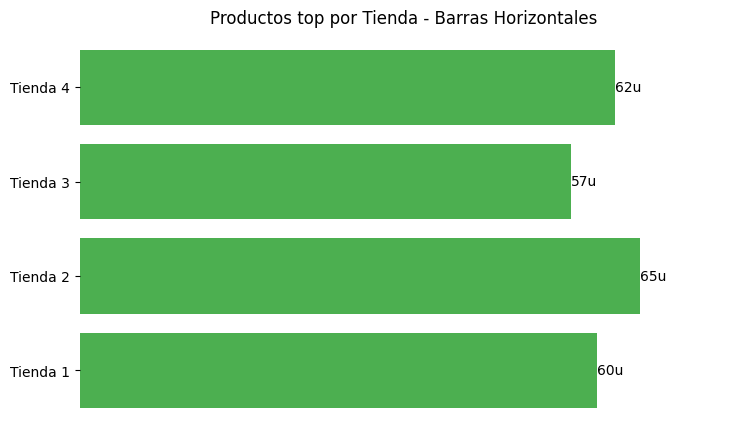

In [18]:
import numpy as np

print("\n" * 2)  # Espacio entre gráficos

# Datos para gráficos (asumiendo los mismos datos anteriores)
nombres = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
ventas_top = [60, 65, 57, 62]  # Productos top por tienda
color = "#4CAF50"  # Mismo color verde

# --- Gráfico de columnas ---
plt.figure(figsize=(8, 5))
bars = plt.bar(nombres, ventas_top, color=color)
plt.title("Productos más vendidos por Tienda - Barras")
plt.yticks([])
plt.ylim(0, max(ventas_top) + 10)
plt.box(False)

for bar, venta in zip(bars, ventas_top):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{venta}u",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout(pad=3)
plt.show()
print("\n" * 2)

# --- Gráfico circular ---
plt.figure(figsize=(6, 6))
plt.pie(ventas_top, labels=nombres, autopct='%1.1f%%', startangle=140, colors=[color]*len(nombres))
plt.title("Distribución de productos top por Tienda - Circular")
plt.tight_layout()
plt.show()
print("\n" * 2)

# --- Gráfico de barras horizontales ---
plt.figure(figsize=(8, 5))
bars_h = plt.barh(nombres, ventas_top, color=color)
plt.title("Productos top por Tienda - Barras Horizontales")
plt.xticks([])
plt.xlim(0, max(ventas_top) + 10)
plt.box(False)

for bar, venta in zip(bars_h, ventas_top):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"{venta}u",
             ha='left', va='center', fontsize=10)

plt.tight_layout(pad=3)
plt.show()
print("\n" * 2)

# 5. Envío promedio por tienda

In [19]:
# Convertir DataFrames a listas de diccionarios
tiendas = [
    ("Tienda 1", tienda.to_dict('records')),
    ("Tienda 2", tienda2.to_dict('records')),
    ("Tienda 3", tienda3.to_dict('records')),
    ("Tienda 4", tienda4.to_dict('records'))
]

resultados = []
for nombre, ventas in tiendas:
    total_envios = 0.0
    contador = 0

    for producto in ventas:
        try:
            # Limpiar y convertir a float
            costo = str(producto['Costo de envío']).replace('$', '').replace(',', '')
            total_envios += float(costo)
            contador += 1
        except (KeyError, ValueError):
            continue

    promedio = round(total_envios / contador, 2) if contador > 0 else 0.0
    resultados.append((nombre, promedio))

# Mostrar resultados
print("🚚 COSTO PROMEDIO DE ENVÍO POR TIENDA\n")
for nombre, promedio in resultados:
    print(f"→ {nombre}: ${promedio:.2f}")
    print("─" * 40)

# Encontrar extremos
mas_caro = max(resultados, key=lambda x: x[1])
mas_barato = min(resultados, key=lambda x: x[1])

print(f"\n📌 TIENDA CON ENVÍOS MÁS CAROS: {mas_caro[0]} (${mas_caro[1]:.2f})")
print(f"📌 TIENDA CON ENVÍOS MÁS ECONÓMICOS: {mas_barato[0]} (${mas_barato[1]:.2f})")

🚚 COSTO PROMEDIO DE ENVÍO POR TIENDA

→ Tienda 1: $26018.61
────────────────────────────────────────
→ Tienda 2: $25216.24
────────────────────────────────────────
→ Tienda 3: $24805.68
────────────────────────────────────────
→ Tienda 4: $23459.46
────────────────────────────────────────

📌 TIENDA CON ENVÍOS MÁS CAROS: Tienda 1 ($26018.61)
📌 TIENDA CON ENVÍOS MÁS ECONÓMICOS: Tienda 4 ($23459.46)


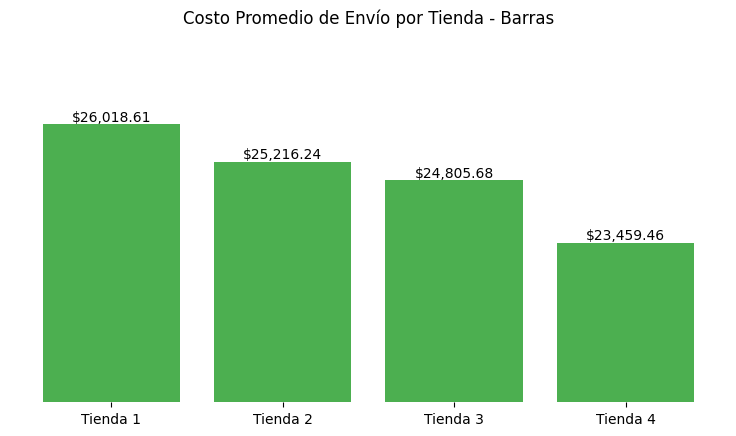

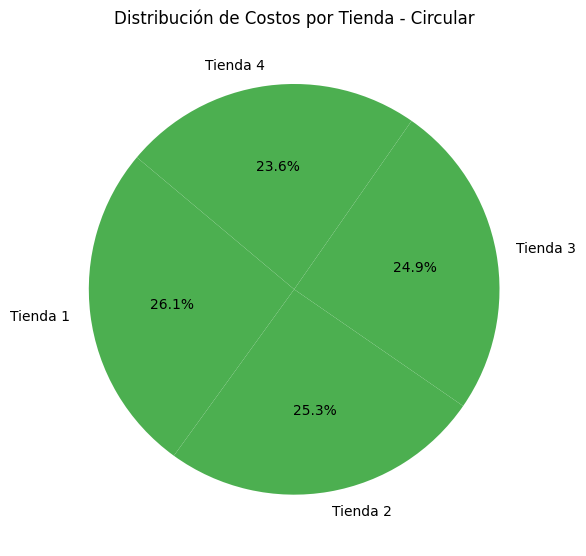

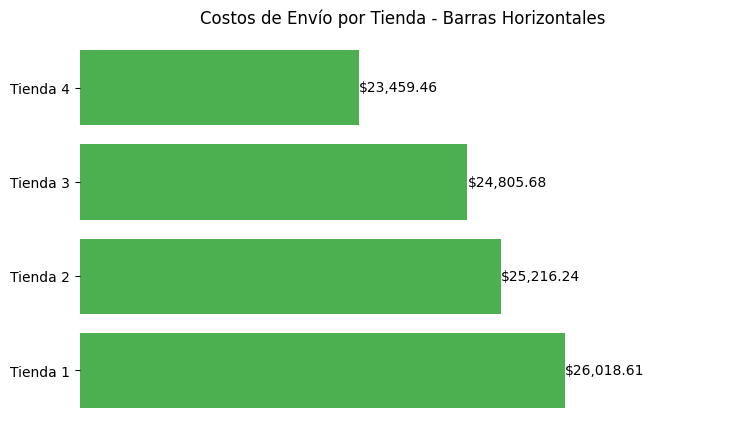

In [20]:
print("\n" * 2)  # Espacio inicial

# Datos
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
costos = [26018.61, 25216.24, 24805.68, 23459.46]
color = "#4CAF50"  # Mismo color verde

# --- Gráfico de Barras Verticales ---
plt.figure(figsize=(8, 5))
bars = plt.bar(tiendas, costos, color=color)
plt.title("Costo Promedio de Envío por Tienda - Barras")
plt.yticks([])  # Elimina números del eje Y
plt.ylim(20000, max(costos) + 2000)
plt.box(False)  # Elimina el marco

# Etiquetas de valor
for bar, costo in zip(bars, costos):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f"${costo:,.2f}",  # Formato con 2 decimales y separador de miles
             ha='center', va='bottom', fontsize=10)

plt.tight_layout(pad=3)
plt.show()
print("\n" * 2)

# --- Gráfico Circular ---
plt.figure(figsize=(6, 6))
plt.pie(costos, labels=tiendas, autopct='%1.1f%%', startangle=140,
        colors=[color]*len(tiendas), wedgeprops={'linewidth': 0.5})
plt.title("Distribución de Costos por Tienda - Circular")
plt.tight_layout()
plt.show()
print("\n" * 2)

# --- Gráfico de Barras Horizontales ---
plt.figure(figsize=(8, 5))
bars_h = plt.barh(tiendas, costos, color=color)
plt.title("Costos de Envío por Tienda - Barras Horizontales")
plt.xticks([])  # Elimina números del eje X
plt.xlim(20000, max(costos) + 2000)
plt.box(False)  # Elimina el marco

# Etiquetas de valor
for bar, costo in zip(bars_h, costos):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f"${costo:,.2f}",
             ha='left', va='center', fontsize=10)

plt.tight_layout(pad=3)
plt.show()
print("\n" * 2)

## Graficos de Analisis Final

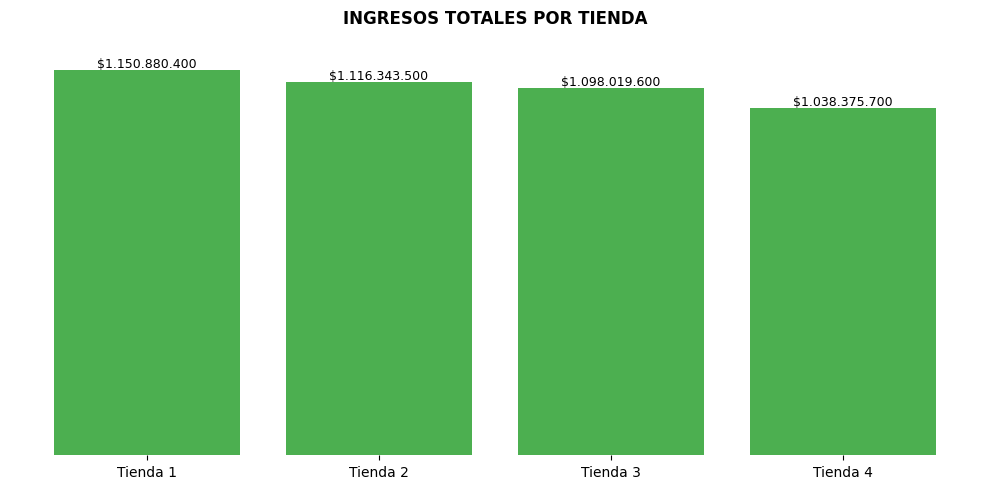

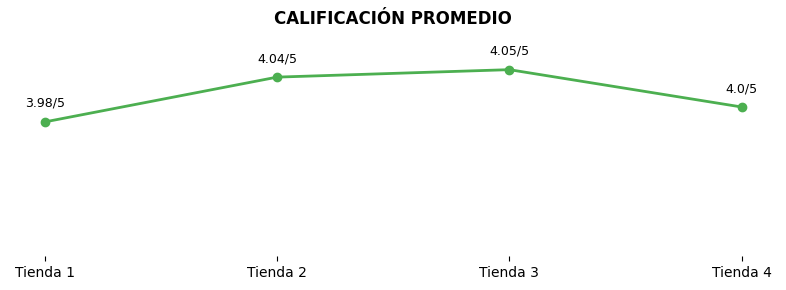

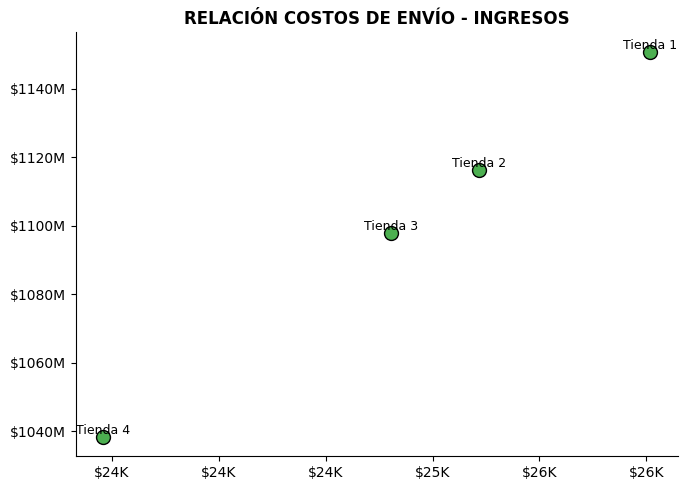

In [21]:
import matplotlib.pyplot as plt


# Configuración común
COLOR = '#4CAF50'
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False


# Datos
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [1150880400, 1116343500, 1098019600, 1038375700]
ratings = [3.98, 4.04, 4.05, 4.0]
costos_envio = [26018.61, 25216.24, 24805.68, 23459.46]

print("\n"*2)  # Espacio inicial

# 1. Gráfico de Barras: Ingresos Totales (valores completos)
plt.figure(figsize=(10, 5))  # Aumentamos tamaño para mejor visualización
bars = plt.bar(tiendas, ingresos, color=COLOR)
plt.title("INGRESOS TOTALES POR TIENDA", fontweight='bold', pad=20)
plt.yticks([])
plt.box(False)

# Formateo personalizado con separadores de miles
for bar, valor in zip(bars, ingresos):
    formatted_value = f"${valor:,}".replace(",", "X").replace(".", ",").replace("X", ".")
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height(),
             formatted_value,
             ha='center',
             va='bottom',
             fontsize=9,
             rotation=0)

plt.tight_layout()
plt.show()
print("\n"*2)

# 2. Gráfico de Líneas: Evaluación de Clientes
plt.figure(figsize=(8, 3))
plt.plot(tiendas, ratings, marker='o', color=COLOR, linewidth=2)
plt.title("CALIFICACIÓN PROMEDIO", fontweight='bold')
plt.ylim(3.8, 4.1)
plt.yticks([])
plt.box(False)

for i, (tienda, rating) in enumerate(zip(tiendas, ratings)):
    plt.text(i, rating + 0.02, f"{rating}/5",
            ha='center', fontsize=9)

plt.tight_layout()
plt.show()
print("\n"*2)

# Formateo personalizado con separadores de miles
formato_miles = lambda x, pos: f"${x:,.0f}".replace(",", ".")
formato_miles_ingresos = lambda x, pos: f"${x/1e6:,.1f}M".replace(",", ".")

# 3. Gráfico de Dispersión: Costo vs Rendimiento
plt.figure(figsize=(7, 5))
plt.scatter(costos_envio, ingresos, s=100, color=COLOR, edgecolor='black')

plt.title("RELACIÓN COSTOS DE ENVÍO - INGRESOS", fontweight='bold')
plt.gca().yaxis.set_major_formatter(lambda x, _: f"${x/1e6:.0f}M")
plt.gca().xaxis.set_major_formatter(lambda x, _: f"${x/1e3:.0f}K")

for i, (costo, ingreso) in enumerate(zip(costos_envio, ingresos)):
    plt.text(costo, ingreso, f'Tienda {i+1}',
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## Análisis visual rápido:
Barras: Muestra claramente que Tienda 4 tiene los menores ingresos

Líneas: Revela que las calificaciones son similares en todas las tiendas

Dispersión: Demuestra que mayores costos logísticos no generan más ingresos

## Recomendación final:
La Tienda 4 es la mejor candidata para venta por:


1.   Menores ingresos totales
2.   Costos logísticos no compensados con ganancias
3.  Rendimiento comercial más bajo (a pesar de buena evaluación de clientes)

Nota: Considerar transferir estrategias logísticas de Tienda 4 a otras antes de venta